Actually, considering that we have circular pupil, a out-of-focus point object will be seen as a donut. Convolving this "Point-Spread-Function" with the apparent shape of the satellite could give us a trail cross-section with a double peak structure.

Below we assume the apparent shape is a 1.5 x 2 m square.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [2]:
#satellite parameters
l1 = 1.5 #meter
l2 = 2 #meter
h = 550e3

In [3]:
f=10.3
d=8.36
pixel_scale = 10 #micron
plate_scale = 0.2
e = 0.61
seeing = 0.7
zangle = 40
def getSatPSF(f, d, e, l1, l2, h, zangle, seeing, pixel_scale, plate_scale):
    fno = f/d
    cosz = np.cos(np.radians(zangle))
    range = h/cosz
    donutR=round((1/(1/f-1/range)-f)*1e6/fno/2) #in micron, trangeis is for image of a point object
    s1 = int(l1/range/np.pi*180*3600/plate_scale*pixel_scale)
    s2 = int(l2/range/np.pi*180*3600/plate_scale*pixel_scale)
    print('donutR = %d micron, satellite conv kernel = %d x %d microns'%(donutR, s1, s2))
    
    padding = 5 #microns
    side = int(donutR + padding) #this is actually half of side length
    x0=np.linspace(-side,side,side*2+1)
    [x, y] = np.meshgrid(x0,x0)
    r = np.sqrt(x**2+y**2)
    z = np.zeros((side*2+1, side*2+1))
    mask = np.bitwise_and((r<donutR), (r>donutR*e))
    z[mask] = 1 #image of a point object
    
    s = np.ones((s1, s2))
    f = convolve2d(z,s) #sat is a extended source
    
    sAtm = round(seeing/plate_scale*pixel_scale/2.355) #sigma in micron
    side = sAtm*5 + padding  #this is actually half of side length
    x0=np.linspace(-side,side,side*2+1)
    [x, y] = np.meshgrid(x0,x0)
    r = np.sqrt(x**2+y**2)
    zAtm = np.exp(-r**2/(2*sAtm**2))
    
    psf = convolve2d(f, zAtm)
    psf = psf/np.sum(psf)
    f1 = (max(l1,l2)/range/np.pi*180*3600)**2
    f2 = (d/range/np.pi*180*3600)**2
    f3 = seeing**2
    fwhm_exp = np.sqrt(f1+f2+f3)/plate_scale*pixel_scale
    print('expected FWHM = %d microns'%(fwhm_exp))
    return psf, fwhm_exp

In [4]:
[psf, fwhm_exp] = getSatPSF(f,d,e, l1, l2, h, zangle, seeing, pixel_scale, plate_scale)

donutR = 60 micron, satellite conv kernel = 21 x 28 microns
expected FWHM = 128 microns


Text(0.5, 1.0, '311 x 318')

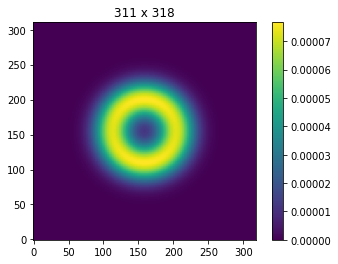

In [5]:
plt.imshow(psf, origin='lower left')
plt.colorbar()
[n1, n2] = psf.shape
plt.title('%d x %d'%(n1,n2))

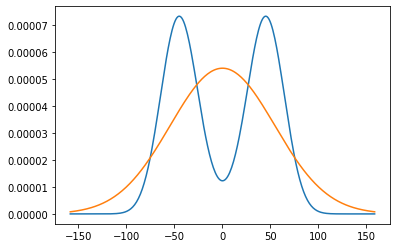

In [6]:
aa = psf[int(n1/2),:]
x1 = np.linspace(-(n1-1)/2, (n1-1)/2, n1)
x2 = np.linspace(-(n2-1)/2, (n2-1)/2, n2)
[x, y] = np.meshgrid(x2,x1)
r = np.sqrt(x**2+y**2)
pred = np.exp(-r**2/2/(fwhm_exp/2.355)**2)
pred = pred/np.sum(pred)
plt.plot(x2, aa)
plt.plot(x2, pred[int(n1/2),:]);

Text(0.5, 0, 'LSSTCam pixel')

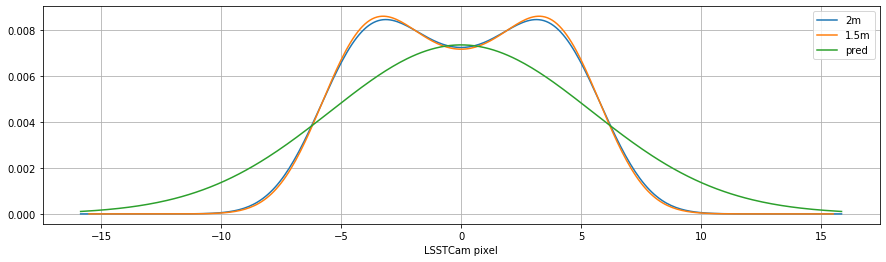

In [7]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
plt.plot(x2/pixel_scale, np.sum(psf,axis=0),label='2m');
plt.plot(x1/pixel_scale, np.sum(psf,axis=1), label='1.5m');
plt.plot(x2/pixel_scale, np.sum(pred,axis=0),label='pred');
plt.legend()
plt.grid()
plt.xlabel('LSSTCam pixel')

In [8]:
aa = np.sum(psf,axis=0)
idx = np.argmax(aa==max(aa))
print('peak pixel flux/total flux = %.4f'%sum(aa[idx-5:idx+5]))
aa = np.sum(pred,axis=0)
idx = np.argmax(aa==max(aa))
print('peak pixel flux/total flux (Gaussian Prediction) = %.4f'%sum(aa[idx-5:idx+5]))

peak pixel flux/total flux = 0.0841
peak pixel flux/total flux (Gaussian Prediction) = 0.0733


donutR = 33 micron, satellite conv kernel = 24 x 32 microns
expected FWHM = 104 microns


Text(0.5, 1.0, '420 x 428')

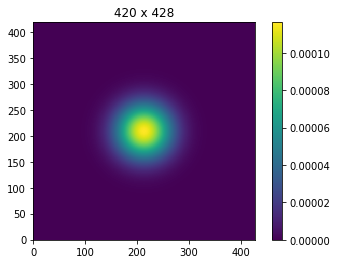

In [9]:
f=11.72
d=4.01
pixel_scale = 15 #micron
plate_scale = 0.2637
e = 0.3396
seeing = 1.3
zangle = 40
[psf, fwhm_exp] = getSatPSF(f,d,e, l1, l2, h, zangle, seeing, pixel_scale, plate_scale)
plt.imshow(psf, origin='lower left')
plt.colorbar()
[n1, n2] = psf.shape
plt.title('%d x %d'%(n1,n2))

In [10]:
x1 = np.linspace(-(n1-1)/2, (n1-1)/2, n1)
x2 = np.linspace(-(n2-1)/2, (n2-1)/2, n2)
[x, y] = np.meshgrid(x2,x1)
r = np.sqrt(x**2+y**2)
pred = np.exp(-r**2/2/(fwhm_exp/2.355)**2)
pred = pred/np.sum(pred)

Text(0.5, 0, 'DECam pixel')

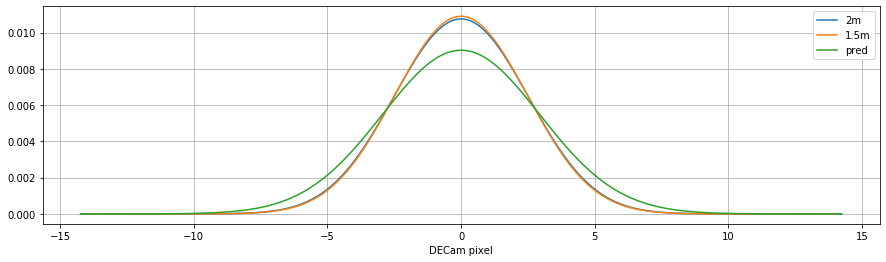

In [11]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
plt.plot(x2/pixel_scale, np.sum(psf,axis=0),label='2m');
plt.plot(x1/pixel_scale, np.sum(psf,axis=1), label='1.5m');
plt.plot(x2/pixel_scale, np.sum(pred,axis=0),label='pred');
plt.legend()
plt.grid()
plt.xlabel('DECam pixel')